In [30]:
import pandas as pd

data = pd.read_csv("DataFiles/PruneLatencyNoTraining.csv", header='infer')

In [31]:
def remove_unwated_columns(data):
    return data.drop(['Name', 'Agent', 'Notes', 'User', 'Tags', 'Created', 'Sweep'], axis=1)

def get_rows_with_col_value(data, col, value):
    return data[data[col] == value]

def remove_top1_under(data, threshold):
    return data[data['Top1'] >= threshold]

In [32]:
data = remove_unwated_columns(data)
finished_runs = get_rows_with_col_value(data, 'State', 'finished')
finished_runs


State  Runtime  filter_pruner_20  filter_pruner_40  filter_pruner_60  \
0     finished       37          0.891275          0.840301          0.895867   
1     finished       37          0.730296          0.801089          0.971097   
2     finished       44          0.484452          0.926072          0.939492   
3     finished       38          0.924371          0.983391          0.547082   
4     finished       36          0.494629          0.893945          0.908276   
...        ...      ...               ...               ...               ...   
1574  finished       40          0.164268          0.005908          0.015461   
1575  finished       42          0.898849          0.252303          0.029231   
1576  finished       50          0.450474          0.278031          0.610577   
1577  finished       39          0.351214          0.387067          0.286195   
1578  finished       39          0.221701          0.340662          0.103303   

      filter_pruner_70  epochs  learning_rate  Latency   Loss  Throughput  \
0             0.985729     NaN            NaN    3.277  1.888      306.43   
1             0.981776     NaN            NaN    3.279  1.861      305.91   
2             0.988535     NaN            NaN    3.296  1.808      306.97   
3             0.962719     NaN            NaN    3.314  2.070      306.13   
4             0.971079     NaN            NaN    3.319  1.875      293.56   
...                ...     ...            ...      ...    ...         ...   
1574          0.203389     NaN            NaN    4.432  1.731      300.43   
1575          0.273782     NaN            NaN    4.434  1.880      299.79   
1576          0.044756     NaN            NaN    4.448  2.089      303.99   
1577          0.027830     NaN            NaN    4.453  1.816      297.79   
1578          0.499863     NaN            NaN    4.470  1.848      302.64   

       Top1   Top5  Total_Latency  
0     25.28  82.85          12.93  
1     28.27  82.74          12.89  
2     32.86  84.44          12.93  
3     26.01  83.01          12.94  
4     29.74  84.40          12.93  
...     ...    ...            ...  
1574  34.30  87.11          13.18  
1575  26.30  82.15          13.04  
1576  19.28  76.51          12.99  
1577  30.40  84.35          13.00  
1578  31.37  83.20          13.05  

[1579 rows x 14 columns]

In [33]:
# Count number of failed experiements
# Count number of experiments with a top1==100/|classes|
# Remove name, agent, notes, user, tags, created, sweep columns
# Find how reducing the inference latency effects the total latency

In [35]:
latency_data = finished_runs.drop(['State', 'Runtime', 'epochs', 'learning_rate'], axis=1)
latency_data

filter_pruner_20  filter_pruner_40  filter_pruner_60  filter_pruner_70  \
0             0.891275          0.840301          0.895867          0.985729   
1             0.730296          0.801089          0.971097          0.981776   
2             0.484452          0.926072          0.939492          0.988535   
3             0.924371          0.983391          0.547082          0.962719   
4             0.494629          0.893945          0.908276          0.971079   
...                ...               ...               ...               ...   
1574          0.164268          0.005908          0.015461          0.203389   
1575          0.898849          0.252303          0.029231          0.273782   
1576          0.450474          0.278031          0.610577          0.044756   
1577          0.351214          0.387067          0.286195          0.027830   
1578          0.221701          0.340662          0.103303          0.499863   

      Latency   Loss  Throughput   Top1   Top5  Total_Latency  
0       3.277  1.888      306.43  25.28  82.85          12.93  
1       3.279  1.861      305.91  28.27  82.74          12.89  
2       3.296  1.808      306.97  32.86  84.44          12.93  
3       3.314  2.070      306.13  26.01  83.01          12.94  
4       3.319  1.875      293.56  29.74  84.40          12.93  
...       ...    ...         ...    ...    ...            ...  
1574    4.432  1.731      300.43  34.30  87.11          13.18  
1575    4.434  1.880      299.79  26.30  82.15          13.04  
1576    4.448  2.089      303.99  19.28  76.51          12.99  
1577    4.453  1.816      297.79  30.40  84.35          13.00  
1578    4.470  1.848      302.64  31.37  83.20          13.05  

[1579 rows x 10 columns]

In [36]:


# Correlation between Inference Latency and the Total Latency
il_tl_corr = latency_data['Latency'].corr(latency_data['Total_Latency'])

# Correlations between each pruner and the inference Latency
fp_20_corr = latency_data['filter_pruner_20'].corr(latency_data['Latency'])
fp_40_corr = latency_data['filter_pruner_40'].corr(latency_data['Latency'])
fp_60_corr = latency_data['filter_pruner_60'].corr(latency_data['Latency'])
fp_70_corr = latency_data['filter_pruner_70'].corr(latency_data['Latency'])

correlations = pd.DataFrame([(fp_20_corr, fp_40_corr, fp_60_corr, fp_70_corr, il_tl_corr)], columns=['fp_20', 'fp_40', 'fp_60', 'fp_70', 'latency_to_total'])
correlations

fp_20     fp_40    fp_60    fp_70  latency_to_total
0 -0.11259 -0.552583 -0.40775 -0.80726           0.31715

In [37]:
# Correlation between Latency and top1
t1_il_corr = latency_data['Latency'].corr(latency_data['Top1'])

# Correlations between each pruner and Top1
t1_fp_20_corr = latency_data['filter_pruner_20'].corr(latency_data['Top1'])
t1_fp_40_corr = latency_data['filter_pruner_40'].corr(latency_data['Top1'])
t1_fp_60_corr = latency_data['filter_pruner_60'].corr(latency_data['Top1'])
t1_fp_70_corr = latency_data['filter_pruner_70'].corr(latency_data['Top1'])

t1_correlations = pd.DataFrame([(t1_fp_20_corr, t1_fp_40_corr, t1_fp_60_corr, t1_fp_70_corr, t1_il_corr)], columns=['fp_20', 'fp_40', 'fp_60', 'fp_70', 'latency_to_Top1'])
t1_correlations


fp_20     fp_40     fp_60     fp_70  latency_to_Top1
0  0.004462 -0.071923 -0.104505 -0.152767         0.090325

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import math

str_to_index = {'Latency': 4, 'Loss': 5, 'Throughput': 6, 'Top1': 7, 'Top5': 8, 'Total_Latency': 9, 'PCA':10}

def get_bin_type_index(name):
    bin_type_dict = {'mean': 1, 'max': 2, 'min': 3}
    bin_type = bin_type_dict.get(name)
    if bin_type is None:
        raise ValueError('Invalid bin type. Choose one of: [mean, min, max]')
    return bin_type

def build_line(nparray, col_index, against_index):
    x_vals = nparray[:,col_index]
    y_vals = nparray[:,against_index]
    return zip(*sorted(zip(x_vals, y_vals))) # x and y values, sorted by x


def plot_pruners(dataframe, against: str, title, bin_type='mean'):
    # X axis will be 0 - 1 float of pruner setting
    # Y axis is the against string

    bin_type = get_bin_type_index(bin_type)


    bin_var = 0.04

    y_axis_index = str_to_index.get(against)
    if y_axis_index is None:
        raise ValueError('Againt value not mapped to a column in the data')

    fp_20 = sorted(build_line(dataframe.to_numpy(), 0, y_axis_index))
    val_tuple = bin_to_param_step(fp_20, bin_var)
    fp_20 = zip(val_tuple[0].tolist(), val_tuple[bin_type].tolist())

    fp_40 = sorted(build_line(dataframe.to_numpy(), 1, y_axis_index))
    val_tuple = bin_to_param_step(fp_40, bin_var)
    fp_40 = zip(val_tuple[0].tolist(), val_tuple[bin_type].tolist())

    fp_60 = sorted(build_line(dataframe.to_numpy(), 2, y_axis_index))
    val_tuple = bin_to_param_step(fp_60, bin_var)
    fp_60 = zip(val_tuple[0].tolist(), val_tuple[bin_type].tolist())

    fp_70 = sorted(build_line(dataframe.to_numpy(), 3, y_axis_index))
    val_tuple = bin_to_param_step(fp_70, bin_var)
    fp_70 = zip(val_tuple[0].tolist(), val_tuple[bin_type].tolist())

    fig, ax = plt.subplots(figsize=(20,10))
    ax.plot(*zip(*fp_20), label='Filter Pruner Layer 3.1')
    ax.plot(*zip(*fp_40), label='Filter Pruner Layer 3.2')
    ax.plot(*zip(*fp_60), label='Filter Pruner Layer 2')
    ax.plot(*zip(*fp_70), label='Filter Pruner Layer 1')

    ax.set_title(title, fontsize=25)
    ax.set_ylabel(against, fontsize=20)
    ax.set_xlabel('Target Sparsity', fontsize=20)

    ax.legend(prop={"size":16})
    plt.tight_layout()
    plt.show()




def bin_to_param_step(data, step_size: float):
    assert step_size < 1
    assert step_size > 0
    assert 100%(step_size*100) == 0

    x, y = data
    value = np.array(y)
    parameter = np.array(x)

    num_groups = math.floor(100 / (step_size*100))

    binned_mean_value = np.zeros(num_groups)
    binned_max_value = np.zeros(num_groups)
    binned_min_value = np.zeros(num_groups)
    binned_parameters = np.zeros(num_groups)


    for i in range(num_groups):
        start = i * 1/num_groups
        stop = start + 1/num_groups
        # get the min within start & stop. value, not index

        indices = np.intersect1d(np.where(parameter > start), np.where(parameter < stop))

        binned_mean_value[i] = np.mean(value[indices])
        if len(indices) > 0:
            binned_max_value[i] = np.amax(value[indices])
            binned_min_value[i] = np.amin(value[indices])
        binned_parameters[i] = start

    return binned_parameters, binned_mean_value, binned_max_value, binned_min_value


def bin_data(data, target_num_groups):
    x, y = data
    data_per_bin = int(math.ceil(len(x)/target_num_groups))
    value = np.array(y)
    parameter = np.array(x)
    
    binned_mean_value = np.zeros(target_num_groups)
    binned_max_value = np.zeros(target_num_groups)
    binned_min_value = np.zeros(target_num_groups)
    binned_parameters = np.zeros(target_num_groups)

    actual_groups = 0

    for i in range(target_num_groups):
        start = i * data_per_bin
        stop = start + data_per_bin - 1
        if (stop > len(x)):
            actual_groups = i
            break
        else:
            actual_groups = i
        binned_mean_value[i] = np.mean(value[start : stop])
        binned_max_value[i] = np.amax(value[start : stop])
        binned_min_value[i] = np.amin(value[start : stop])
        binned_parameters[i] = np.mean(parameter[start : stop])

    binned_mean_value = binned_mean_value[0:actual_groups]
    binned_max_value = binned_max_value[0:actual_groups]
    binned_min_value = binned_min_value[0:actual_groups]
    binned_parameters = binned_parameters[0:actual_groups]

    return binned_parameters, binned_mean_value, binned_max_value, binned_min_value



In [39]:
100%5

0

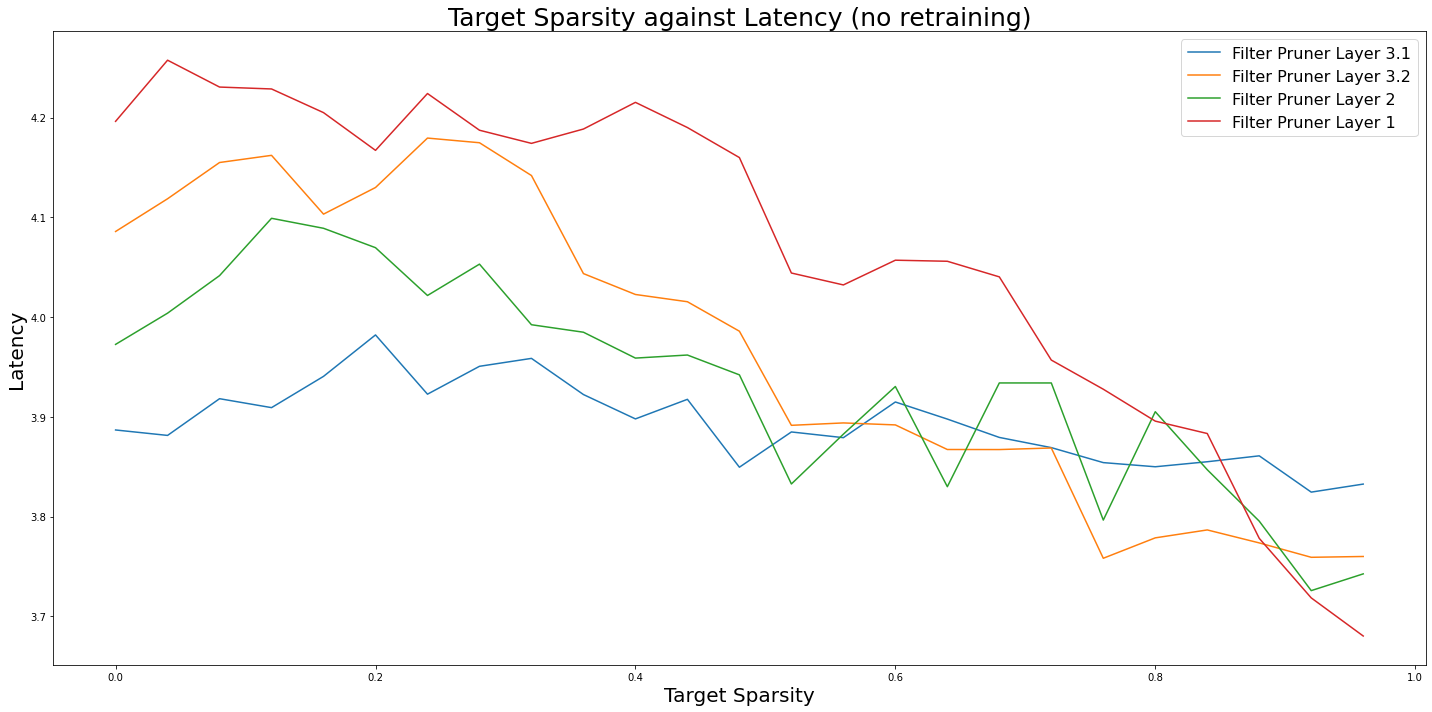

In [40]:
plot_pruners(latency_data, 'Latency', 'Target Sparsity against Latency (no retraining)', 'mean')

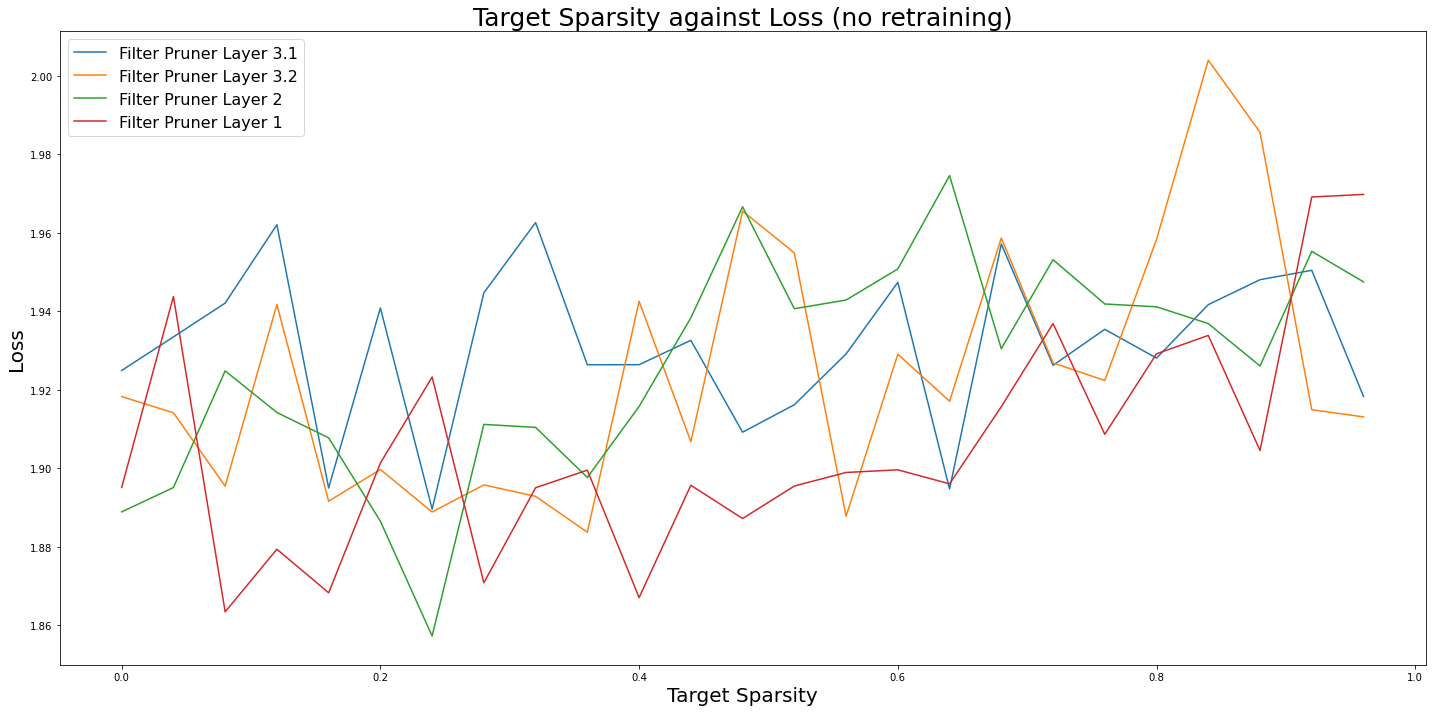

In [41]:
plot_pruners(latency_data, 'Loss', 'Target Sparsity against Loss (no retraining)')

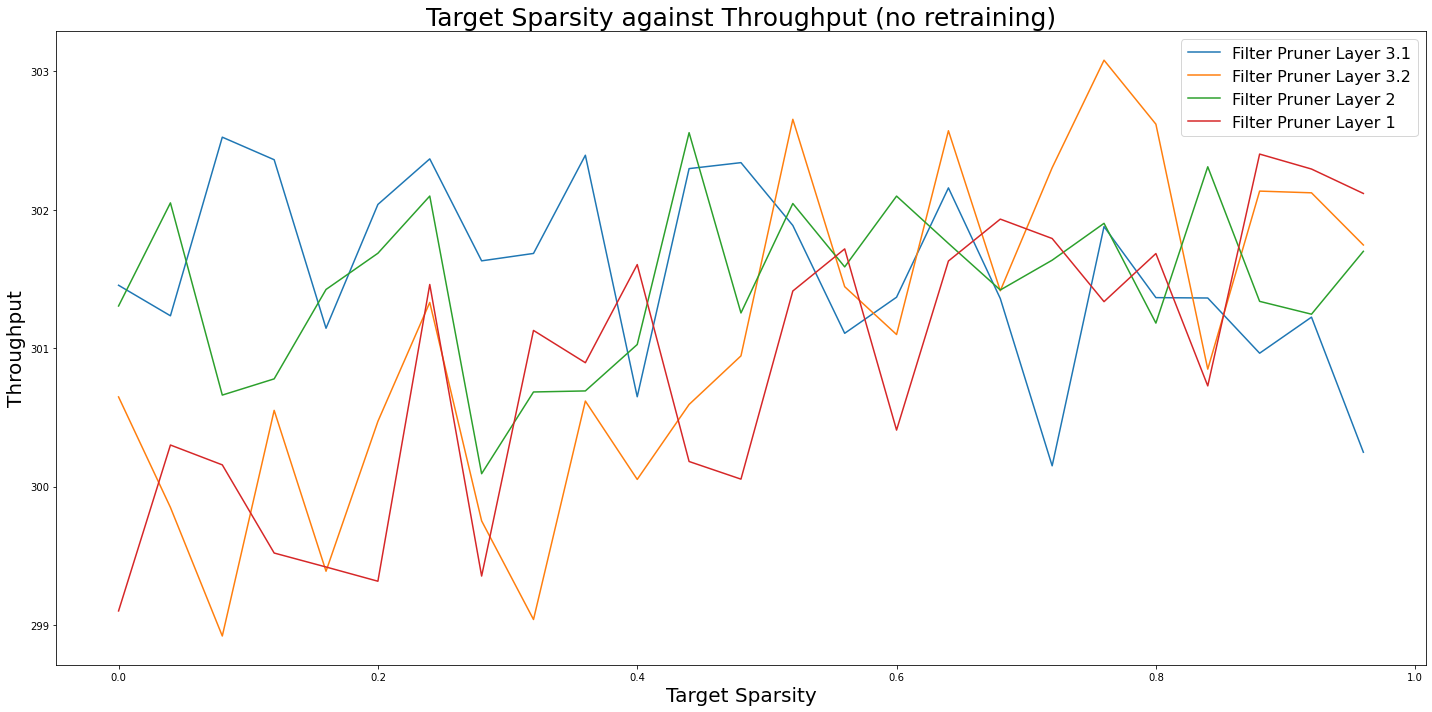

In [42]:
plot_pruners(latency_data, 'Throughput', 'Target Sparsity against Throughput (no retraining)')

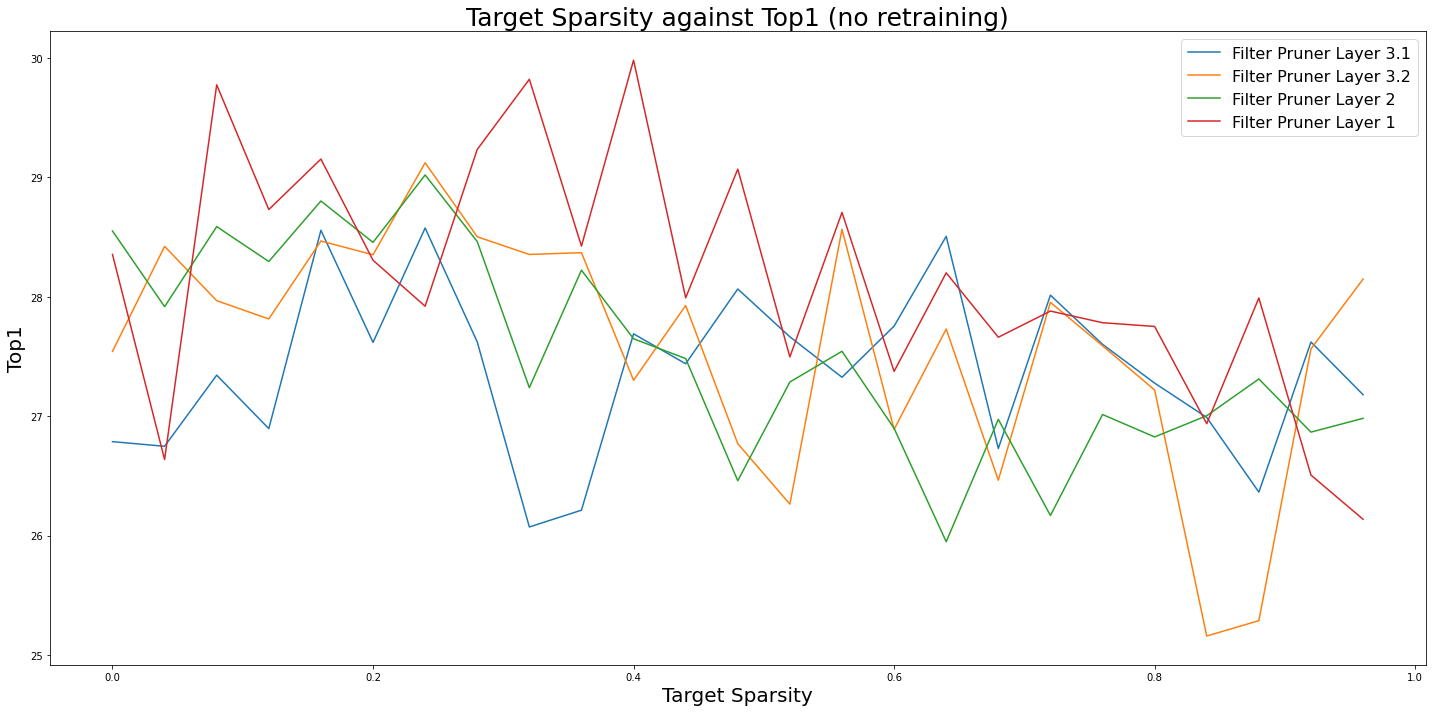

In [43]:
plot_pruners(latency_data, 'Top1', 'Target Sparsity against Top1 (no retraining)', 'mean')

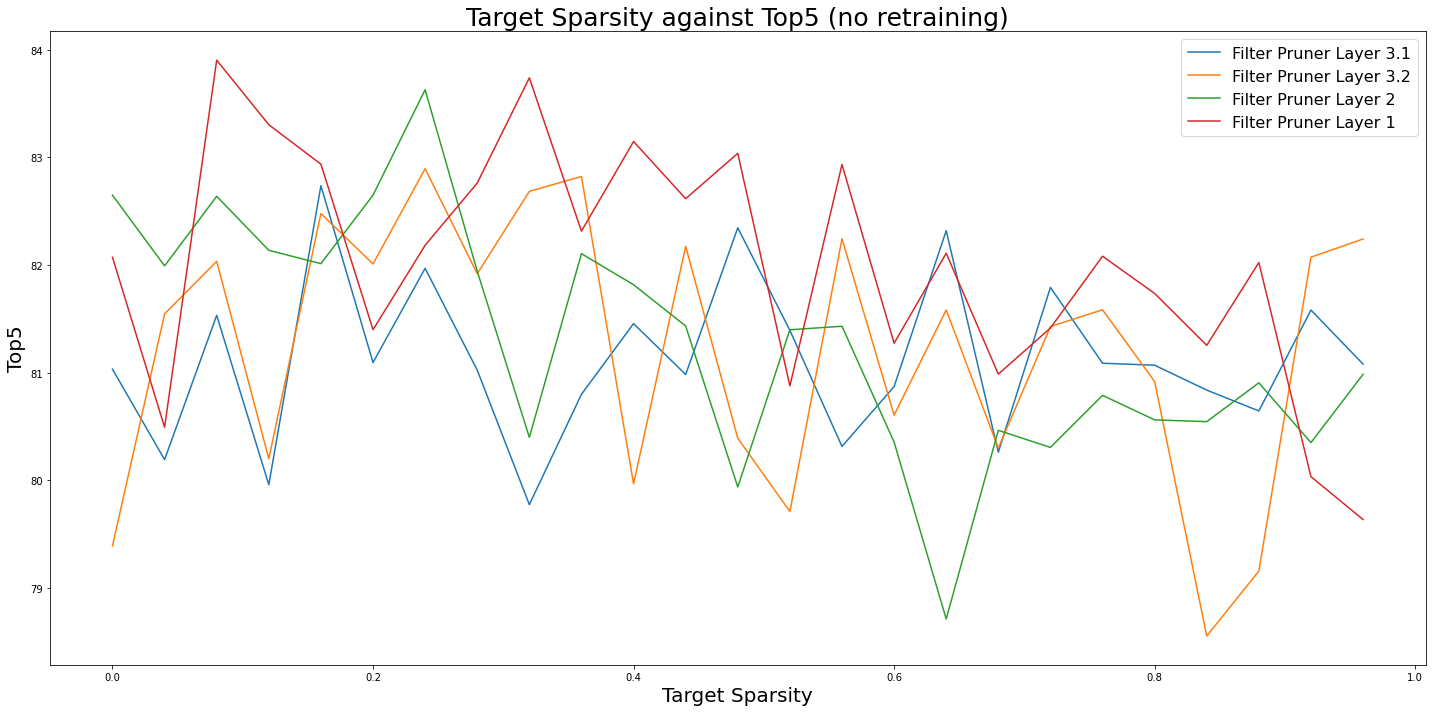

In [44]:
plot_pruners(latency_data, 'Top5', 'Target Sparsity against Top5 (no retraining)')

In [59]:
    from matplotlib import cm
    
    def plot_surface(pruner_index, data, param_name='Target sparsity', latency_col_index=4, top1_col_index=7):
    
        fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(20,10))
        ax.set_xlabel('Latency')
        ax.set_ylabel('Top1')
        ax.set_zlabel(param_name)
        #ax.plot_wireframe(cParams, gammas, avg_errors_array)
        #ax.plot3D(cParams, gammas, avg_errors_array)
        #ax.scatter3D(cParams, gammas, avg_errors_array, zdir='z',cmap='viridis')


        surf = ax.plot_trisurf(data.iloc[:, latency_col_index],  data.iloc[:, top1_col_index], data.iloc[:, pruner_index], cmap=cm.jet, linewidth=0.1)
        fig.colorbar(surf, shrink=0.5, aspect=5)    
        #ax.invert_xaxis()
        #ax.invert_yaxis()
        #ax.set_xlim(4.5, 3.2)
        ax.set_ylim(40, 10)
        #plt.savefig('./plots/avgErrs_vs_C_andgamma_type_%s.png'%(k))
        plt.show()

In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Latency: 4
# Top1 : 7
t_latency = latency_data.iloc[:,4]
t_Top1 = latency_data.iloc[:,7]
results = pd.concat([t_latency, t_Top1], axis=1, join='inner')

norm_results = StandardScaler().fit_transform(results)

In [61]:
filters = latency_data.iloc[:,0:5]
norm_filters = StandardScaler().fit_transform(filters)
pca_f = PCA(n_components=1)
pca_filters = pca_f.fit_transform(norm_filters)

pca_df_filters = pd.concat([pd.DataFrame(pca_filters, columns=['PCA_filters']), results], axis=1, join='inner')
pca_f.explained_variance_ratio_

array([0.46676143])

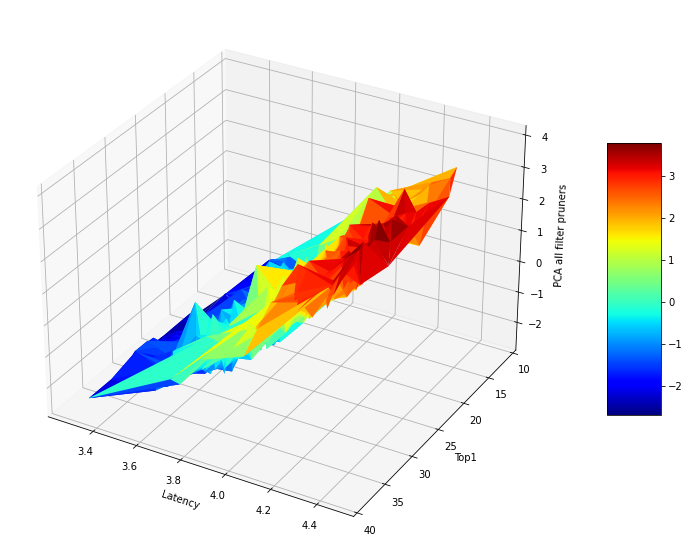

In [62]:
plot_surface(0, pca_df_filters, param_name='PCA all filter pruners', latency_col_index=1, top1_col_index=2)

C:\Users\fried\.conda\envs\DissertationVis\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\fried\.conda\envs\DissertationVis\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


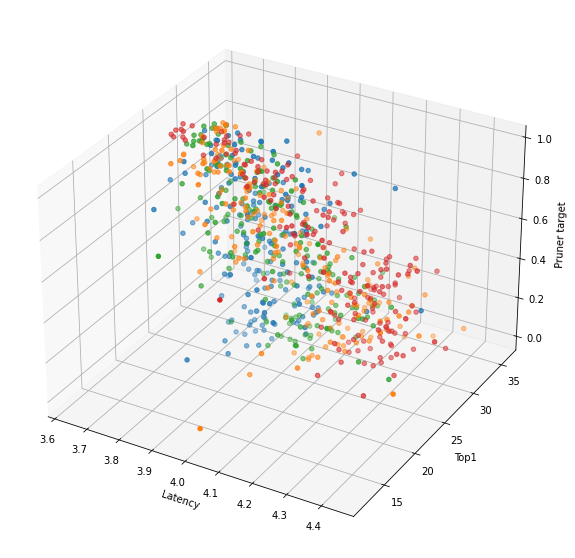

In [63]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')


for i in range(4):
    fp = sorted(build_line(latency_data.to_numpy(), i, 4))
    x, y, z, w = bin_to_param_step(fp, 0.005)

    fp = sorted(build_line(latency_data.to_numpy(), i, 7))
    x, y_hat, z, w = bin_to_param_step(fp, 0.005)
    xs = y # array n elements long
    ys = y_hat
    zs = x
    ax.scatter(xs, ys, zs)

ax.set_xlabel('Latency')
ax.set_ylabel('Top1')
ax.set_zlabel('Pruner target')

plt.show()

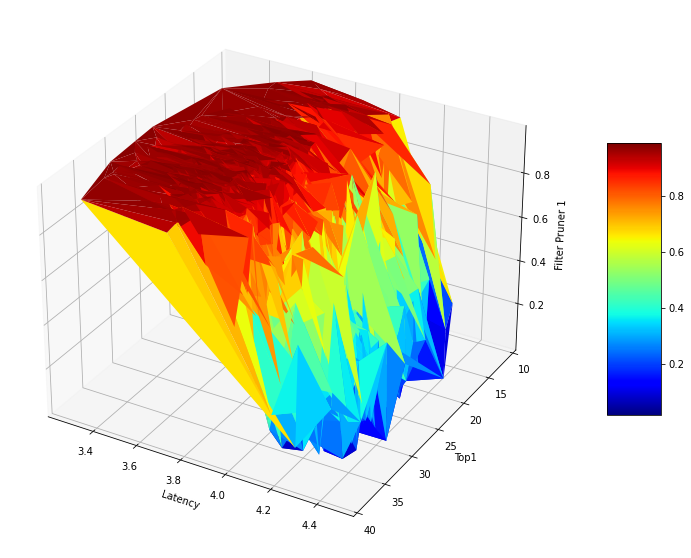

In [64]:
plot_surface(3, latency_data, param_name='Filter Pruner 1')

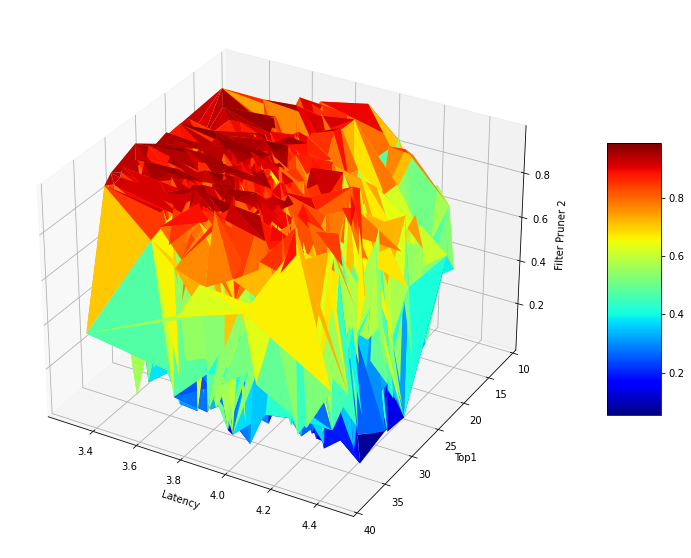

In [65]:
plot_surface(2, latency_data, param_name='Filter Pruner 2')

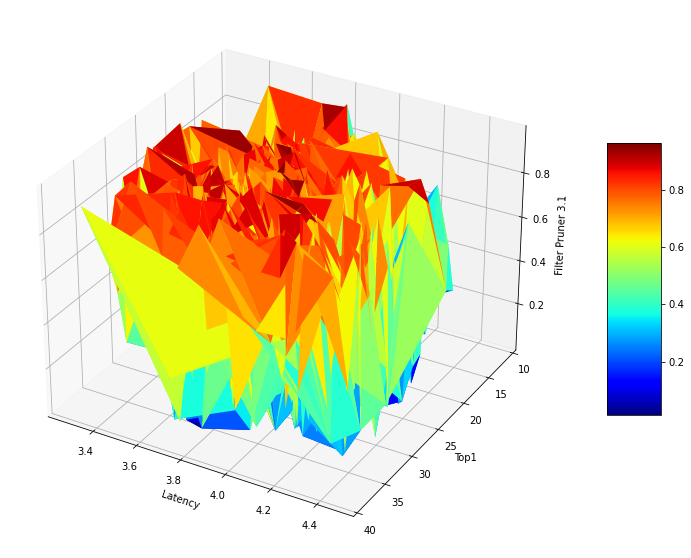

In [66]:
plot_surface(0, latency_data, param_name='Filter Pruner 3.1')

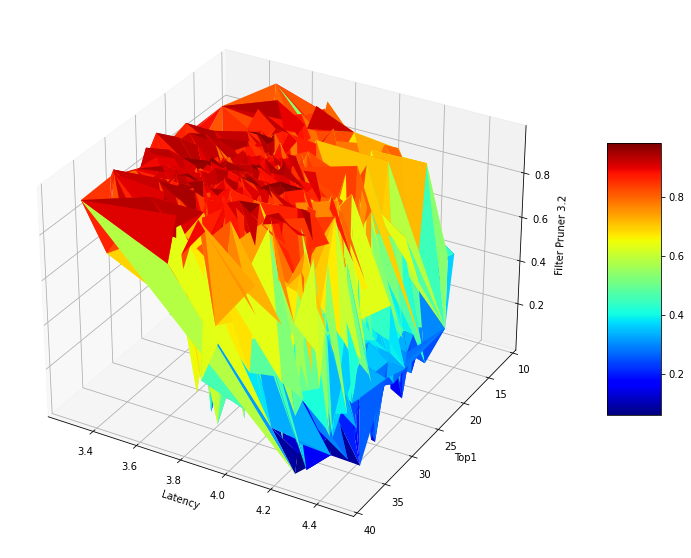

In [67]:
plot_surface(1, latency_data, param_name='Filter Pruner 3.2')

In [89]:
data = pd.read_csv("DataFiles/Exp1.csv", header='infer')
data

Name     State                   Created  Runtime  \
0        quiet-sweep-1622  finished  2021-03-14T09:58:34.000Z       44   
1         dark-sweep-1621    failed  2021-03-14T09:57:50.000Z       39   
2         kind-sweep-1620  finished  2021-03-14T09:57:37.000Z       38   
3     splendid-sweep-1619  finished  2021-03-14T09:56:55.000Z       46   
4      earnest-sweep-1618  finished  2021-03-14T09:56:54.000Z       38   
...                   ...       ...                       ...      ...   
1617        young-sweep-5  finished  2021-03-13T22:13:06.000Z       37   
1618     electric-sweep-4  finished  2021-03-13T22:12:23.000Z       38   
1619     splendid-sweep-3  finished  2021-03-13T22:11:32.000Z       39   
1620    celestial-sweep-2  finished  2021-03-13T22:10:50.000Z       37   
1621      scarlet-sweep-1  finished  2021-03-13T22:10:02.000Z       42   

      filter_pruner_20  filter_pruner_40  filter_pruner_60  filter_pruner_70  \
0             0.211236          0.985024          0.961461          0.821911   
1             0.892495          0.063893          0.922403          0.906605   
2             0.590696          0.957888          0.341079          0.867452   
3             0.102022          0.499102          0.646501          0.790421   
4             0.915510          0.632927          0.960175          0.830895   
...                ...               ...               ...               ...   
1617          0.577449          0.586689          0.303937          0.741454   
1618          0.175665          0.488796          0.196537          0.798679   
1619          0.421475          0.492102          0.331467          0.813723   
1620          0.874646          0.086584          0.218721          0.798026   
1621          0.454440          0.447887          0.255212          0.848596   

      Latency   Loss  Throughput   Top1   Top5  Total_Latency  
0       3.859  1.940      296.60  25.86  82.13          13.04  
1         NaN    NaN         NaN    NaN    NaN            NaN  
2       3.830  1.740      299.56  34.12  86.49          13.09  
3       3.902  1.827      305.50  29.12  84.14          12.85  
4       3.722  1.997      305.17  21.51  80.25          12.84  
...       ...    ...         ...    ...    ...            ...  
1617    3.991  1.842      295.72  32.39  83.45          12.84  
1618    4.076  2.039      298.47  23.71  78.32          13.19  
1619    3.981  1.730      303.53  33.67  87.49          12.87  
1620    4.147  1.919      273.17  25.89  80.09          13.31  
1621    3.986  1.815      301.64  31.27  84.14          12.98  

[1622 rows x 14 columns]

In [90]:
sweep = get_rows_with_col_value(data, 'State', 'finished').drop(['State', 'Created'], axis=1)
sweep

Name  Runtime  filter_pruner_20  filter_pruner_40  \
0        quiet-sweep-1622       44          0.211236          0.985024   
2         kind-sweep-1620       38          0.590696          0.957888   
3     splendid-sweep-1619       46          0.102022          0.499102   
4      earnest-sweep-1618       38          0.915510          0.632927   
5         firm-sweep-1617       38          0.051006          0.140391   
...                   ...      ...               ...               ...   
1617        young-sweep-5       37          0.577449          0.586689   
1618     electric-sweep-4       38          0.175665          0.488796   
1619     splendid-sweep-3       39          0.421475          0.492102   
1620    celestial-sweep-2       37          0.874646          0.086584   
1621      scarlet-sweep-1       42          0.454440          0.447887   

      filter_pruner_60  filter_pruner_70  Latency   Loss  Throughput   Top1  \
0             0.961461          0.821911    3.859  1.940      296.60  25.86   
2             0.341079          0.867452    3.830  1.740      299.56  34.12   
3             0.646501          0.790421    3.902  1.827      305.50  29.12   
4             0.960175          0.830895    3.722  1.997      305.17  21.51   
5             0.814983          0.923041    4.022  2.304      297.17  10.11   
...                ...               ...      ...    ...         ...    ...   
1617          0.303937          0.741454    3.991  1.842      295.72  32.39   
1618          0.196537          0.798679    4.076  2.039      298.47  23.71   
1619          0.331467          0.813723    3.981  1.730      303.53  33.67   
1620          0.218721          0.798026    4.147  1.919      273.17  25.89   
1621          0.255212          0.848596    3.986  1.815      301.64  31.27   

       Top5  Total_Latency  
0     82.13          13.04  
2     86.49          13.09  
3     84.14          12.85  
4     80.25          12.84  
5     49.92          12.98  
...     ...            ...  
1617  83.45          12.84  
1618  78.32          13.19  
1619  87.49          12.87  
1620  80.09          13.31  
1621  84.14          12.98  

[1579 rows x 12 columns]

In [91]:
sweep = sweep.reindex(index=sweep.index[::-1]).reset_index().drop(['index'], axis=1)
sweep

Name  Runtime  filter_pruner_20  filter_pruner_40  \
0         scarlet-sweep-1       42          0.454440          0.447887   
1       celestial-sweep-2       37          0.874646          0.086584   
2        splendid-sweep-3       39          0.421475          0.492102   
3        electric-sweep-4       38          0.175665          0.488796   
4           young-sweep-5       37          0.577449          0.586689   
...                   ...      ...               ...               ...   
1574      firm-sweep-1617       38          0.051006          0.140391   
1575   earnest-sweep-1618       38          0.915510          0.632927   
1576  splendid-sweep-1619       46          0.102022          0.499102   
1577      kind-sweep-1620       38          0.590696          0.957888   
1578     quiet-sweep-1622       44          0.211236          0.985024   

      filter_pruner_60  filter_pruner_70  Latency   Loss  Throughput   Top1  \
0             0.255212          0.848596    3.986  1.815      301.64  31.27   
1             0.218721          0.798026    4.147  1.919      273.17  25.89   
2             0.331467          0.813723    3.981  1.730      303.53  33.67   
3             0.196537          0.798679    4.076  2.039      298.47  23.71   
4             0.303937          0.741454    3.991  1.842      295.72  32.39   
...                ...               ...      ...    ...         ...    ...   
1574          0.814983          0.923041    4.022  2.304      297.17  10.11   
1575          0.960175          0.830895    3.722  1.997      305.17  21.51   
1576          0.646501          0.790421    3.902  1.827      305.50  29.12   
1577          0.341079          0.867452    3.830  1.740      299.56  34.12   
1578          0.961461          0.821911    3.859  1.940      296.60  25.86   

       Top5  Total_Latency  
0     84.14          12.98  
1     80.09          13.31  
2     87.49          12.87  
3     78.32          13.19  
4     83.45          12.84  
...     ...            ...  
1574  49.92          12.98  
1575  80.25          12.84  
1576  84.14          12.85  
1577  86.49          13.09  
1578  82.13          13.04  

[1579 rows x 12 columns]

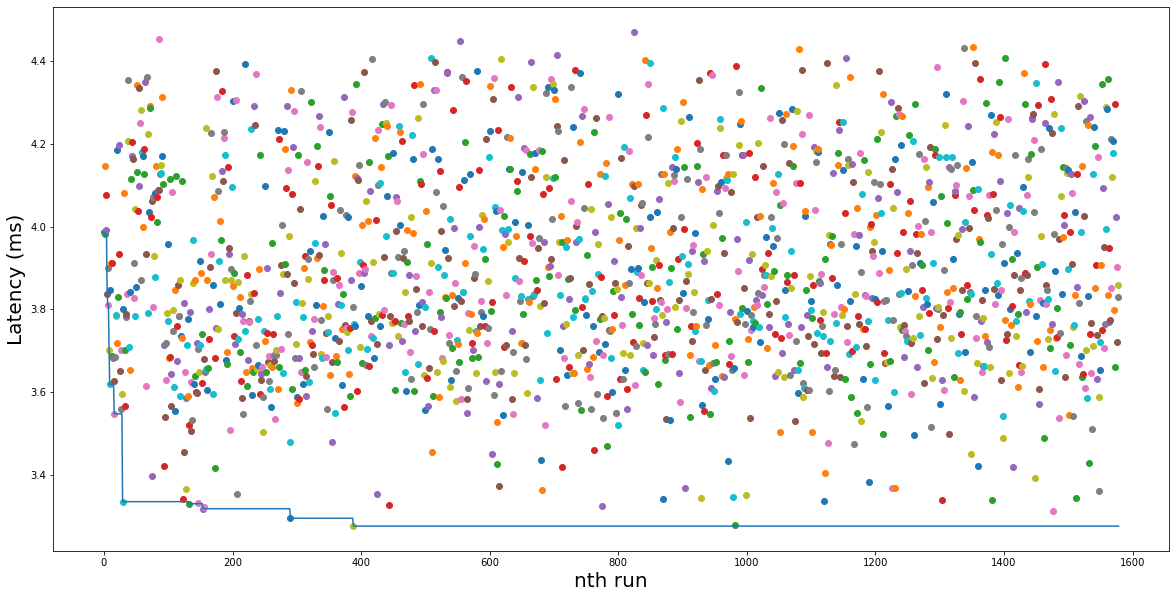

In [92]:
best_line = []
previous_best = 99999

fig, ax = plt.subplots(figsize=(20,10))
for row in sweep.iloc[:, 6].items():
    if row[1] < previous_best:
        best_line.append(row[1])
        previous_best = row[1]
    else:
        best_line.append(previous_best)

    ax.scatter(row[0], row[1])
ax.plot(best_line)
ax.set_ylabel('Latency (ms)', fontsize=20)
ax.set_xlabel('nth run', fontsize=20)

plt.show()


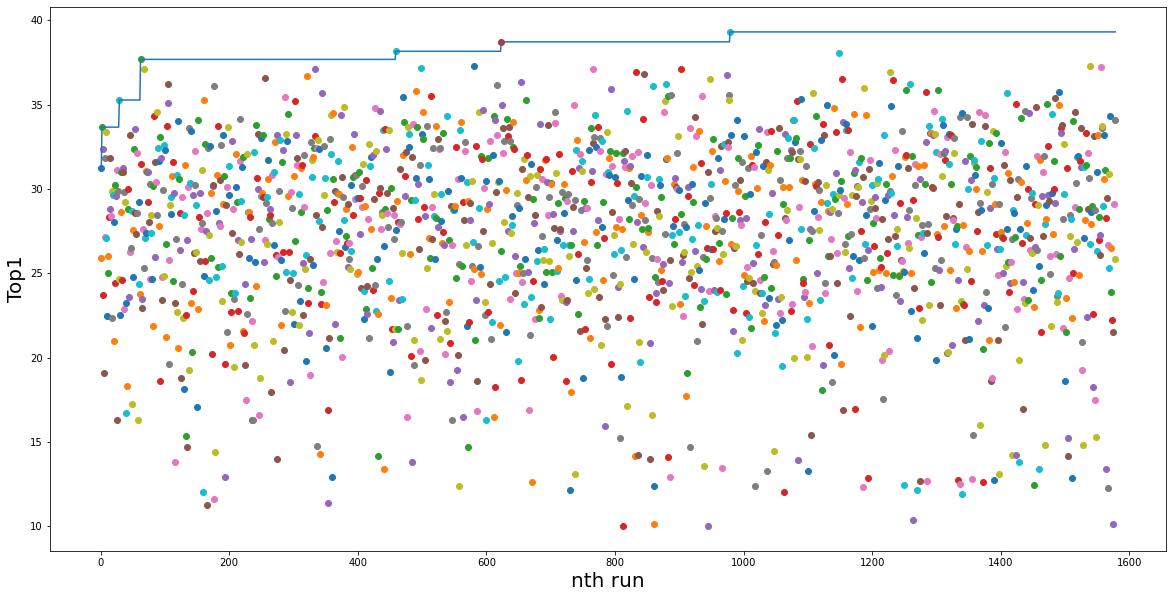

In [93]:
best_line = []
previous_best = 0

fig, ax = plt.subplots(figsize=(20,10))
for row in sweep.iloc[:, 9].items():
    if row[1] > previous_best:
        best_line.append(row[1])
        previous_best = row[1]
    else:
        best_line.append(previous_best)

    ax.scatter(row[0], row[1])
ax.plot(best_line)
ax.set_ylabel('Top1', fontsize=20)
ax.set_xlabel('nth run', fontsize=20)

plt.show()